In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

In [2]:
wine = load_wine()
wine.data.shape

(178, 13)

In [16]:
print("target: ",wine.target)
print("target_name: ",wine.target_names)
print("feature_name:",wine.feature_names)

target:  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2]
target_name:  ['class_0' 'class_1' 'class_2']
feature_name: ['alcohol', 'malic_acid', 'ash', 'alcalinity_of_ash', 'magnesium', 'total_phenols', 'flavanoids', 'nonflavanoid_phenols', 'proanthocyanins', 'color_intensity', 'hue', 'od280/od315_of_diluted_wines', 'proline']


In [3]:
import pandas as pd
wd = pd.DataFrame(wine.data)
td = pd.DataFrame(wine.target)
pd.concat([wd, td], axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,0
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0,2
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0,2
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0,2


In [4]:
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data, wine.target, test_size=0.3)
print("xtrain shape : ",Xtrain.shape)
print("xtest shape : ",Xtest.shape)
print("ytrain shape : ",Ytrain)
print("ytest shape : ",Ytest)

xtrain shape :  (124, 13)
xtest shape :  (54, 13)
ytrain shape :  [1 0 2 2 2 1 1 1 1 2 0 2 2 0 1 2 0 0 0 1 0 0 0 1 1 1 1 0 1 1 1 0 1 0 1 0 1
 2 2 0 2 0 0 1 1 0 0 1 0 0 1 0 2 0 2 0 2 2 0 0 1 0 0 0 1 1 1 2 2 1 2 1 2 2
 1 1 0 1 0 0 0 1 2 2 1 2 1 1 0 1 0 2 1 0 2 2 0 1 1 0 1 1 1 0 2 1 0 0 2 1 0
 2 2 1 0 1 2 1 2 1 0 1 1 2]
ytest shape :  [2 2 1 1 0 1 1 0 1 0 2 2 0 2 0 2 2 1 2 0 0 0 2 0 0 1 2 1 1 0 1 0 2 0 1 1 2
 1 1 2 2 2 1 0 1 1 1 1 1 0 1 0 2 1]


In [5]:
clf = tree.DecisionTreeClassifier(criterion="entropy")
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9629629629629629

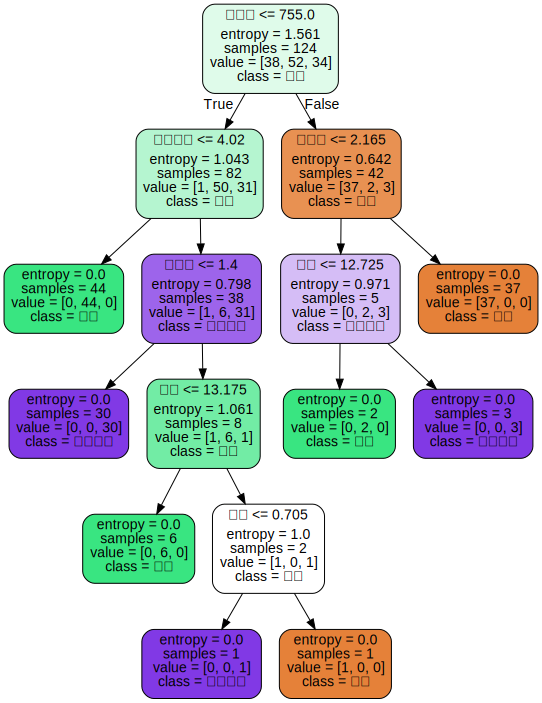

In [67]:
import graphviz
from graphviz import Source
from IPython.display import display
from IPython.display import SVG

feature_name = ['酒精','苹果酸','灰','灰的碱性','镁','总酚','类黄酮','非黄烷类酚类','花青素','颜色强度','色调','od280/od315稀释葡萄酒','脯氨酸']
graph =  Source(tree.export_graphviz(clf, out_file=None, 
                                feature_names=feature_name, 
                                class_names=["琴酒","雪莉","贝尔摩德"],
                                filled=True,
                                rounded=True))

display(SVG(graph.pipe(format='svg')))

In [71]:
[*zip(feature_name,clf.feature_importances_)]

[('酒精', 0.05862962111218865),
 ('苹果酸', 0.0),
 ('灰', 0.0),
 ('灰的碱性', 0.0),
 ('镁', 0.0),
 ('总酚', 0.0),
 ('类黄酮', 0.2271757614068996),
 ('非黄烷类酚类', 0.0),
 ('花青素', 0.0),
 ('颜色强度', 0.2853450772016927),
 ('色调', 0.010335784040804338),
 ('od280/od315稀释葡萄酒', 0.0),
 ('脯氨酸', 0.41851375623841464)]

In [86]:
clf = tree.DecisionTreeClassifier(criterion="entropy", random_state=30)
clf = clf.fit(Xtrain, Ytrain)
score = clf.score(Xtest, Ytest)
score

0.9074074074074074

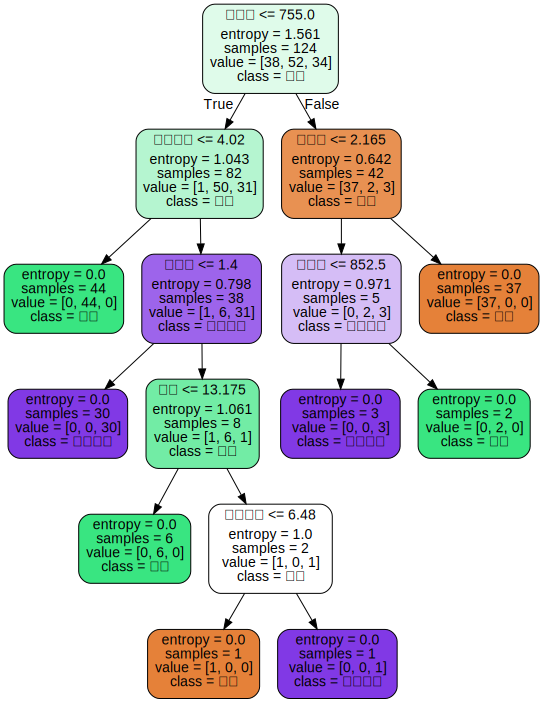

In [88]:
import graphviz
dot_data = tree.export_graphviz(clf, 
                                feature_names=feature_name, 
                                class_names=["琴酒","雪莉","贝尔摩德"],
                               filled=True,
                               rounded=True)
graph = graphviz.Source(dot_data)
graph

In [89]:
from ipywidgets import interactive

def plot_tree(crit, split, depth, min_split, min_leaf=0.2):
    estimator = tree.DecisionTreeClassifier(random_state=0
                                           ,criterion=crit
                                            ,splitter=split
                                           ,max_depth=depth
                                           ,min_samples_split=min_split
                                           ,min_samples_leaf=min_leaf)
    estimator.fit(Xtrain, Ytrain)
    graph = Source(tree.export_graphviz(estimator
                                       ,out_file=None
                                       ,feature_names = feature_name
                                       ,class_names=["琴酒","雪莉","贝尔摩德"]
                                       ,filled=True))
    display(SVG(graph.pipe(format='svg')))
    return estimator
'''
criterion：衡量节点分裂质量的标准
splitter：每个节点的拆分策略
max_depth：树的最大深度
min_samples_split：节点中所需的最小实例数
min_samples_leaf：叶节点上所需的最小实例数
'''
inter=interactive(plot_tree
                 ,crit=['gini','entropy']
                 ,split=["best","random"]
                 ,depth=[1,2,3,4]
                 ,min_split=(0.1,1)
                 ,min_leaf=(0.1,0.5))
display(inter)

interactive(children=(Dropdown(description='crit', options=('gini', 'entropy'), value='gini'), Dropdown(descri…

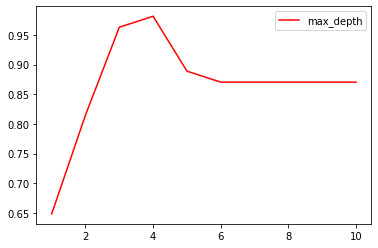

In [91]:
import matplotlib.pyplot as plt
test = []
for i in range(10):
    clf = tree.DecisionTreeClassifier(max_depth=i+1
                                    ,criterion="entropy"
                                    ,random_state=30
                                    ,splitter="rbandom"
                                    )
    clf = clf.fit(Xtrain, Ytrain)
    score = clf.score(Xtest, Ytest)
    test.append(score)
plt.plot(range(1,11),test,color="red",label="max_depth")
plt.legend()
plt.show()

In [94]:
import numpy as np
from sklearn.tree import DecisionTreeRegressor
import matplotlib.pyplot as plt

rng = np.random.RandomState(1) #随机数种子
X = np.sort(5 * rng.rand(80,1), axis=0) #生成0~5之间随机的x的取值
y = np.sin(X).ravel() #生成正弦曲线
y[::5] += 3 * (0.5 - rng.rand(16)) #在正弦曲线上加噪声

In [95]:
y.shape

(80,)

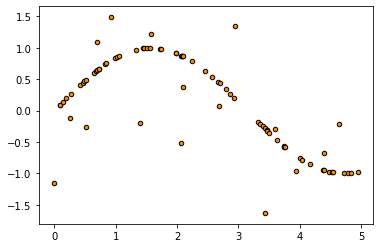

In [96]:
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")

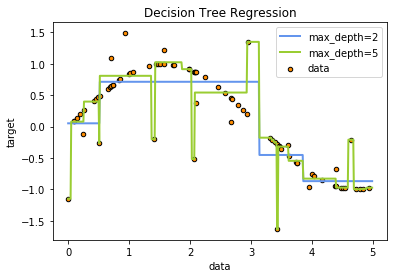

In [99]:
regr_1 = DecisionTreeRegressor(max_depth=2)
regr_2 = DecisionTreeRegressor(max_depth=5)
regr_1.fit(X, y)
regr_2.fit(X, y)
X_test = np.arange(0.0, 5.0, 0.01)[:, np.newaxis]
y_1 = regr_1.predict(X_test)
y_2 = regr_2.predict(X_test)
plt.figure()
plt.scatter(X, y, s=20, edgecolor="black",c="darkorange", label="data")
plt.plot(X_test, y_1, color="cornflowerblue",label="max_depth=2", linewidth=2)
plt.plot(X_test, y_2, color="yellowgreen", label="max_depth=5", linewidth=2)
plt.xlabel("data")
plt.ylabel("target")
plt.title("Decision Tree Regression")
plt.legend()
plt.show()